In [1]:
import xarray as xr
import numpy as np
import pymannkendall as pmk

In [24]:
import netCDF4 as nc
from netCDF4 import Dataset as NetCDFFile

In [25]:
import numpy as np
import pandas as pd
print('all libraries are loaded')

all libraries are loaded


In [27]:
in_file='C:\\Climate_Tutorial\\ERA5 DATASET\\High pptn days\\R10mm_C3S-glob-agric_gfdl-esm2m_rcp2p6_dek_20110101-20401231_v1.1.nc'

In [34]:
# open data
Data=xr.open_dataset(in_file)

In [35]:
Data

<xarray.Dataset>
Dimensions:      (bounds: 2, lat: 360, lon: 720, time: 1080)
Coordinates:
  * time         (time) datetime64[ns] 2011-01-05 2011-01-15 ... 2040-12-25
  * lat          (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon          (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Dimensions without coordinates: bounds
Data variables:
    time_bounds  (time, bounds) datetime64[ns] ...
    R10mm        (time, lat, lon) float32 ...
Attributes:
    title:          R10mm index from ECA rain indices
    institution:    Copernicus Climate Change Service
    source:         Climate projection datasets from the ISIMIP Fast Track pr...
    references:     Tank, A.K., 2010. European Climate Assessment and Dataset...
    comment:        
    history:        Tue Sep 19 09:55:31 2017: cdo -f nc4c -z zip mergetime pr...
    summary:        
    Conventions:    CF-1.7
    contact:        https://climate.copernicus.eu
    project:        C3S_422 Global Agriculture
    creation_date:  2019-04-19T15:22:49GMT
    lineage:        
    keywords:       
    license:

In [36]:
Data.data_vars

Data variables:
    time_bounds  (time, bounds) datetime64[ns] 2011-01-01 ... 2041-01-01
    R10mm        (time, lat, lon) float32 ...

In [37]:
# Select the variable we need to analyse from the data. In this case it is "tp"
Data_2_use=Data['R10mm']

In [38]:
Data_2_use

<xarray.DataArray 'R10mm' (time: 1080, lat: 360, lon: 720)>
[279936000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2011-01-05 2011-01-15 ... 2040-12-25
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Attributes:
    comment:       includes all types (rain, snow, large-scale, convective, e...
    long_name:     Heavy precipitation days (precipitation >= 10 mm)
    units:         day
    cell_methods:  time: sum

In [50]:
# Single line Selection (Selecting location) with interpolation method
SLS=Data_2_use.sel(lon=179.8, lat=89.75, method='nearest')

In [51]:
SLS

<xarray.DataArray 'R10mm' (time: 1080)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-05 2011-01-15 ... 2040-12-25
    lat      float64 89.75
    lon      float64 179.8
Attributes:
    comment:       includes all types (rain, snow, large-scale, convective, e...
    long_name:     Heavy precipitation days (precipitation >= 10 mm)
    units:         day
    cell_methods:  time: sum

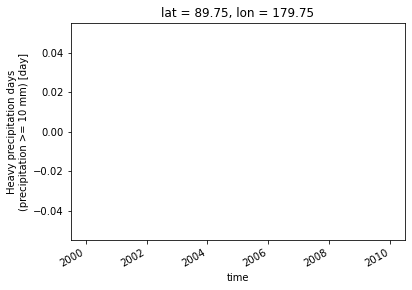

In [52]:
SLS.plot()

## Area Selection and Averaging

In [54]:
#Area Selection and Averaging(using a range selection)
ASA=Data_2_use.sel(lon=np.arange(-180,180,0.5),lat=np.arange(-90,90,0.5),method='nearest')

In [55]:
ASA=ASA
# This gives us the variable "tp" varying on time, lat and long
ASA

<xarray.DataArray 'R10mm' (time: 1080, lat: 360, lon: 720)>
[279936000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2011-01-05 2011-01-15 ... 2040-12-25
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Attributes:
    comment:       includes all types (rain, snow, large-scale, convective, e...
    long_name:     Heavy precipitation days (precipitation >= 10 mm)
    units:         day
    cell_methods:  time: sum

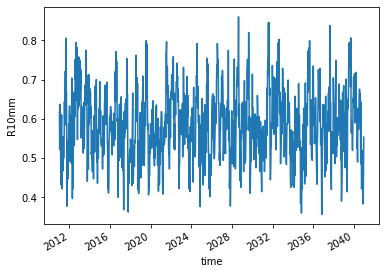

In [56]:
# So we want to have an average for an entire area, so we are going to find the 
# mean of ASA
ASA=ASA.mean(dim=('lon','lat'))
# Now plot the timeseries, which stands for the time series of the region
# we selected
ASA.plot()

## Plot yearly average

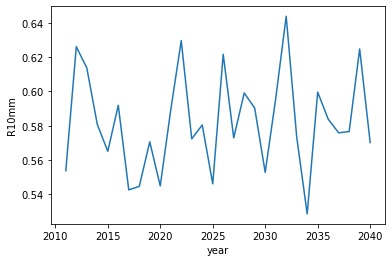

In [57]:
# Annual Averaging, WE want to fine tune the data and see the annual averaging
# do a 'groupby' with time.year to give us yearly groupings
# and then find the average over the time, which is enough to give us the yearly
# average and then plot yearly average
Ann_avg=ASA.groupby('time.year').mean('time')
Ann_avg.plot()

## Find the trend and some staistics in the time series

In [58]:
# since we have already average the annual data, all we need to do 
# is call the stat_results and equate it to the pymankendall we imported
# 
stat_result=pmk.original_test(Ann_avg)
print(stat_result)

Mann_Kendall_Test(trend='no trend', h=False, p=0.5441196833389506, z=0.6065950541190537, Tau=0.08045977011494253, s=35.0, var_s=3141.6666666666665, slope=0.0002906057569715712, intercept=0.5743278231885698)


## Seasonal Climatology(To see the climatological Values for all the seasons)

In [59]:
# To do this, we can use the monthly information, which contains the 
# monthly information(ASA) before we changed it into annual avg.
# Lets print a new variable and call it;
Seas_avg=ASA.groupby('time.season').mean('time') # this is enough to give us 
#the climatological value, since we are not focusing on the spatial information

## We can print out our seasonal averages and see what it contains

In [60]:
print(Seas_avg) # we see the climatological mean for each season over the 
# entire period

<xarray.DataArray 'R10mm' (season: 4)>
array([0.58141696, 0.651603  , 0.5593775 , 0.53582   ], dtype=float32)
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
